# Description
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.

## What is Parkinson’s Disease?
Parkinson’s disease is a central nervous system disorder. Its symptoms occur because of low dopamine levels in the brain. Four Primary symptoms are tremor, rigidity, slow movement and balance problems. Till now no cure for Parkinson’s Disease is known, treatment aims to reduce the effects of the symptoms.

![image.png](https://mobile.hksh.com/sites/default/files/website-media/images/clinical-centres-specialties-and-services/department-of-physiotherapy/parkinson2.jpg )

![image-2.png](https://www.physio-pedia.com/images/thumb/7/75/Parkinson_disease_symtpoms.png/669px-Parkinson_disease_symtpoms.png)

## Attribute Information:
**Matrix column entries (attributes):**

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude

**NHR, HNR** - Two measures of the ratio of noise to tonal components in the voice

**status** - The health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE, D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

## Source:
The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

## Citation:
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

**Link for downloading dataset:
https://archive.ics.uci.edu/ml/datasets/parkinsons**

# Importing the Dependencies

In [92]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC                           # Support vector machine model 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


# Parameters optimization and validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

# Saving best model
import pickle

In [41]:
# Some configs

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

# Data Collection and Data Exploration

In [42]:
# Loading the data from CSV file to pandas dataframe
df = pd.read_csv("data.csv")

In [43]:
# Printing first five rows of the data
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [44]:
# Printing last five rows of the data
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


**Observations:**
"status" column is our target feature. "name" column has no use in prediction part so we will remove it(later but before prediction).

In [45]:
# Checking the number of rows and columns in our dataset
df.shape

(195, 24)

Dataset contains 195 rows and 24 columns

In [46]:
# Getting more information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Observations:**
"name" column is only object dtype, as told earlier I will remove this column as it is of no use in making prediction.
Each column has no null values seems. Let's check for null value in different way.

In [47]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Observations:**
There are no null values in our dataset

# Data Analysis and Data Visualization

In [48]:
# Getting some statistical information of our data
df.describe().T.style.background_gradient(cmap="PiYG")

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.000000,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.000000,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.000000,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.000000,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.000000,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.000000,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.000000,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.000000,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.000000,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.000000,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


## Distribution of our target variable i.e. "status" column

In [49]:
# distribution of our target variable i.e. "status" column/feature
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

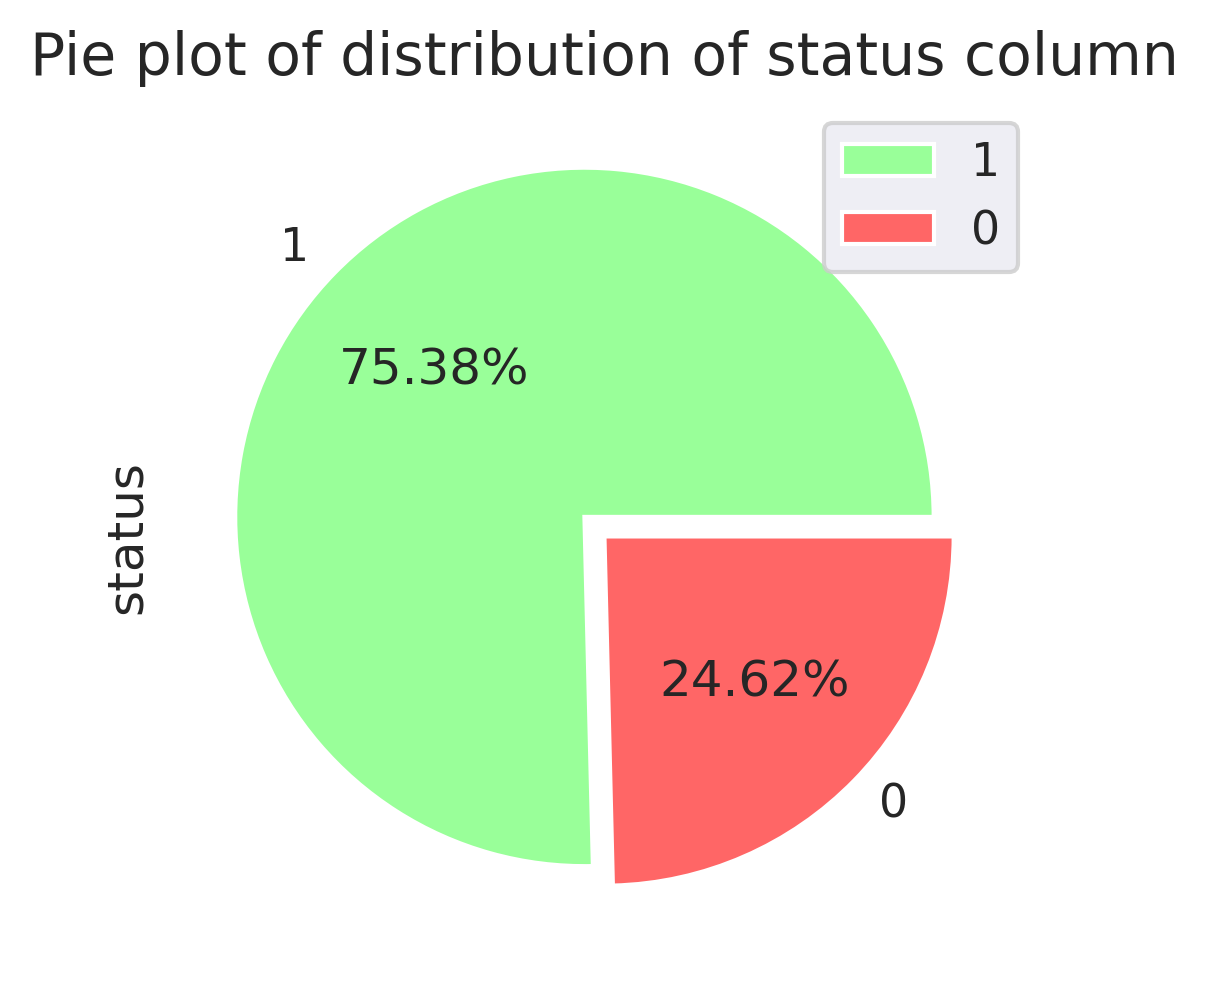

In [50]:
explode=(0.08,0)

df['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(4,4),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of distribution of status column", fontsize=14)
plt.tight_layout()
plt.legend();

## IMBALANCED TARGETS

##### 1 ---> Peoples with Parkinsons disease
##### 0 ---> Healthy peoples

**Observations:**
75.38% peoples (i.e. 147 peoples out of 195 peoples) are those who have parkinson disease. While 24.62% peoples (i.e. 48 peoples out of 195 peoples) are those who don't have parkinsons disease.

## Grouping the data based on target variable

In [51]:
df.groupby("status").mean().style.background_gradient(cmap="PiYG")

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**Observations:**

Here we can clearly observe that peoples with Parkinsons disease have

less MDVP:Fo(Hz) value (around 145.180762),

less MDVP:Fhi(Hz) value (around 188.441463),

less MDVP:Flo(Hz) value (around 106.893558),

relatively high MDVP:Jitter(%) value (around 0.006989),

relatively high MDVP:Jitter(Abs) value (around 0.000051),

relatively high MDVP:RAP value (around 0.003757),

relatively high MDVP:PPQ value (around 0.003900),

relatively high Jitter:DDP value (around 0.011273),

relatively high MDVP:Shimmer value (around 0.033658),

relatively high MDVP:Shimmer(dB) value (around 0.321204),

relatively high Shimmer:APQ3 value (around 0.017676),

relatively high Shimmer:APQ5 value (around 0.020285),

relatively high MDVP:APQ value (around 0.027600),

relatively high Shimmer:DDA value (around 0.053027),

relatively high NHR value (around 0.029211),

less HNR value (around 20.974048),

relatively high RPDE value (around 0.516816),

relatively high DFA value (around 0.725408),

relatively high spread1 value (around -5.333420),

relatively high spread2 value (around 0.248133),

relatively high D2 value (around 2.456058), and

relatively high PPE value (around 0.233828)

**Observations:**
This distinction can be used for making prediction. So this understanding will be found automatically by our Machine Learning Model.

## Correlation Heatmap

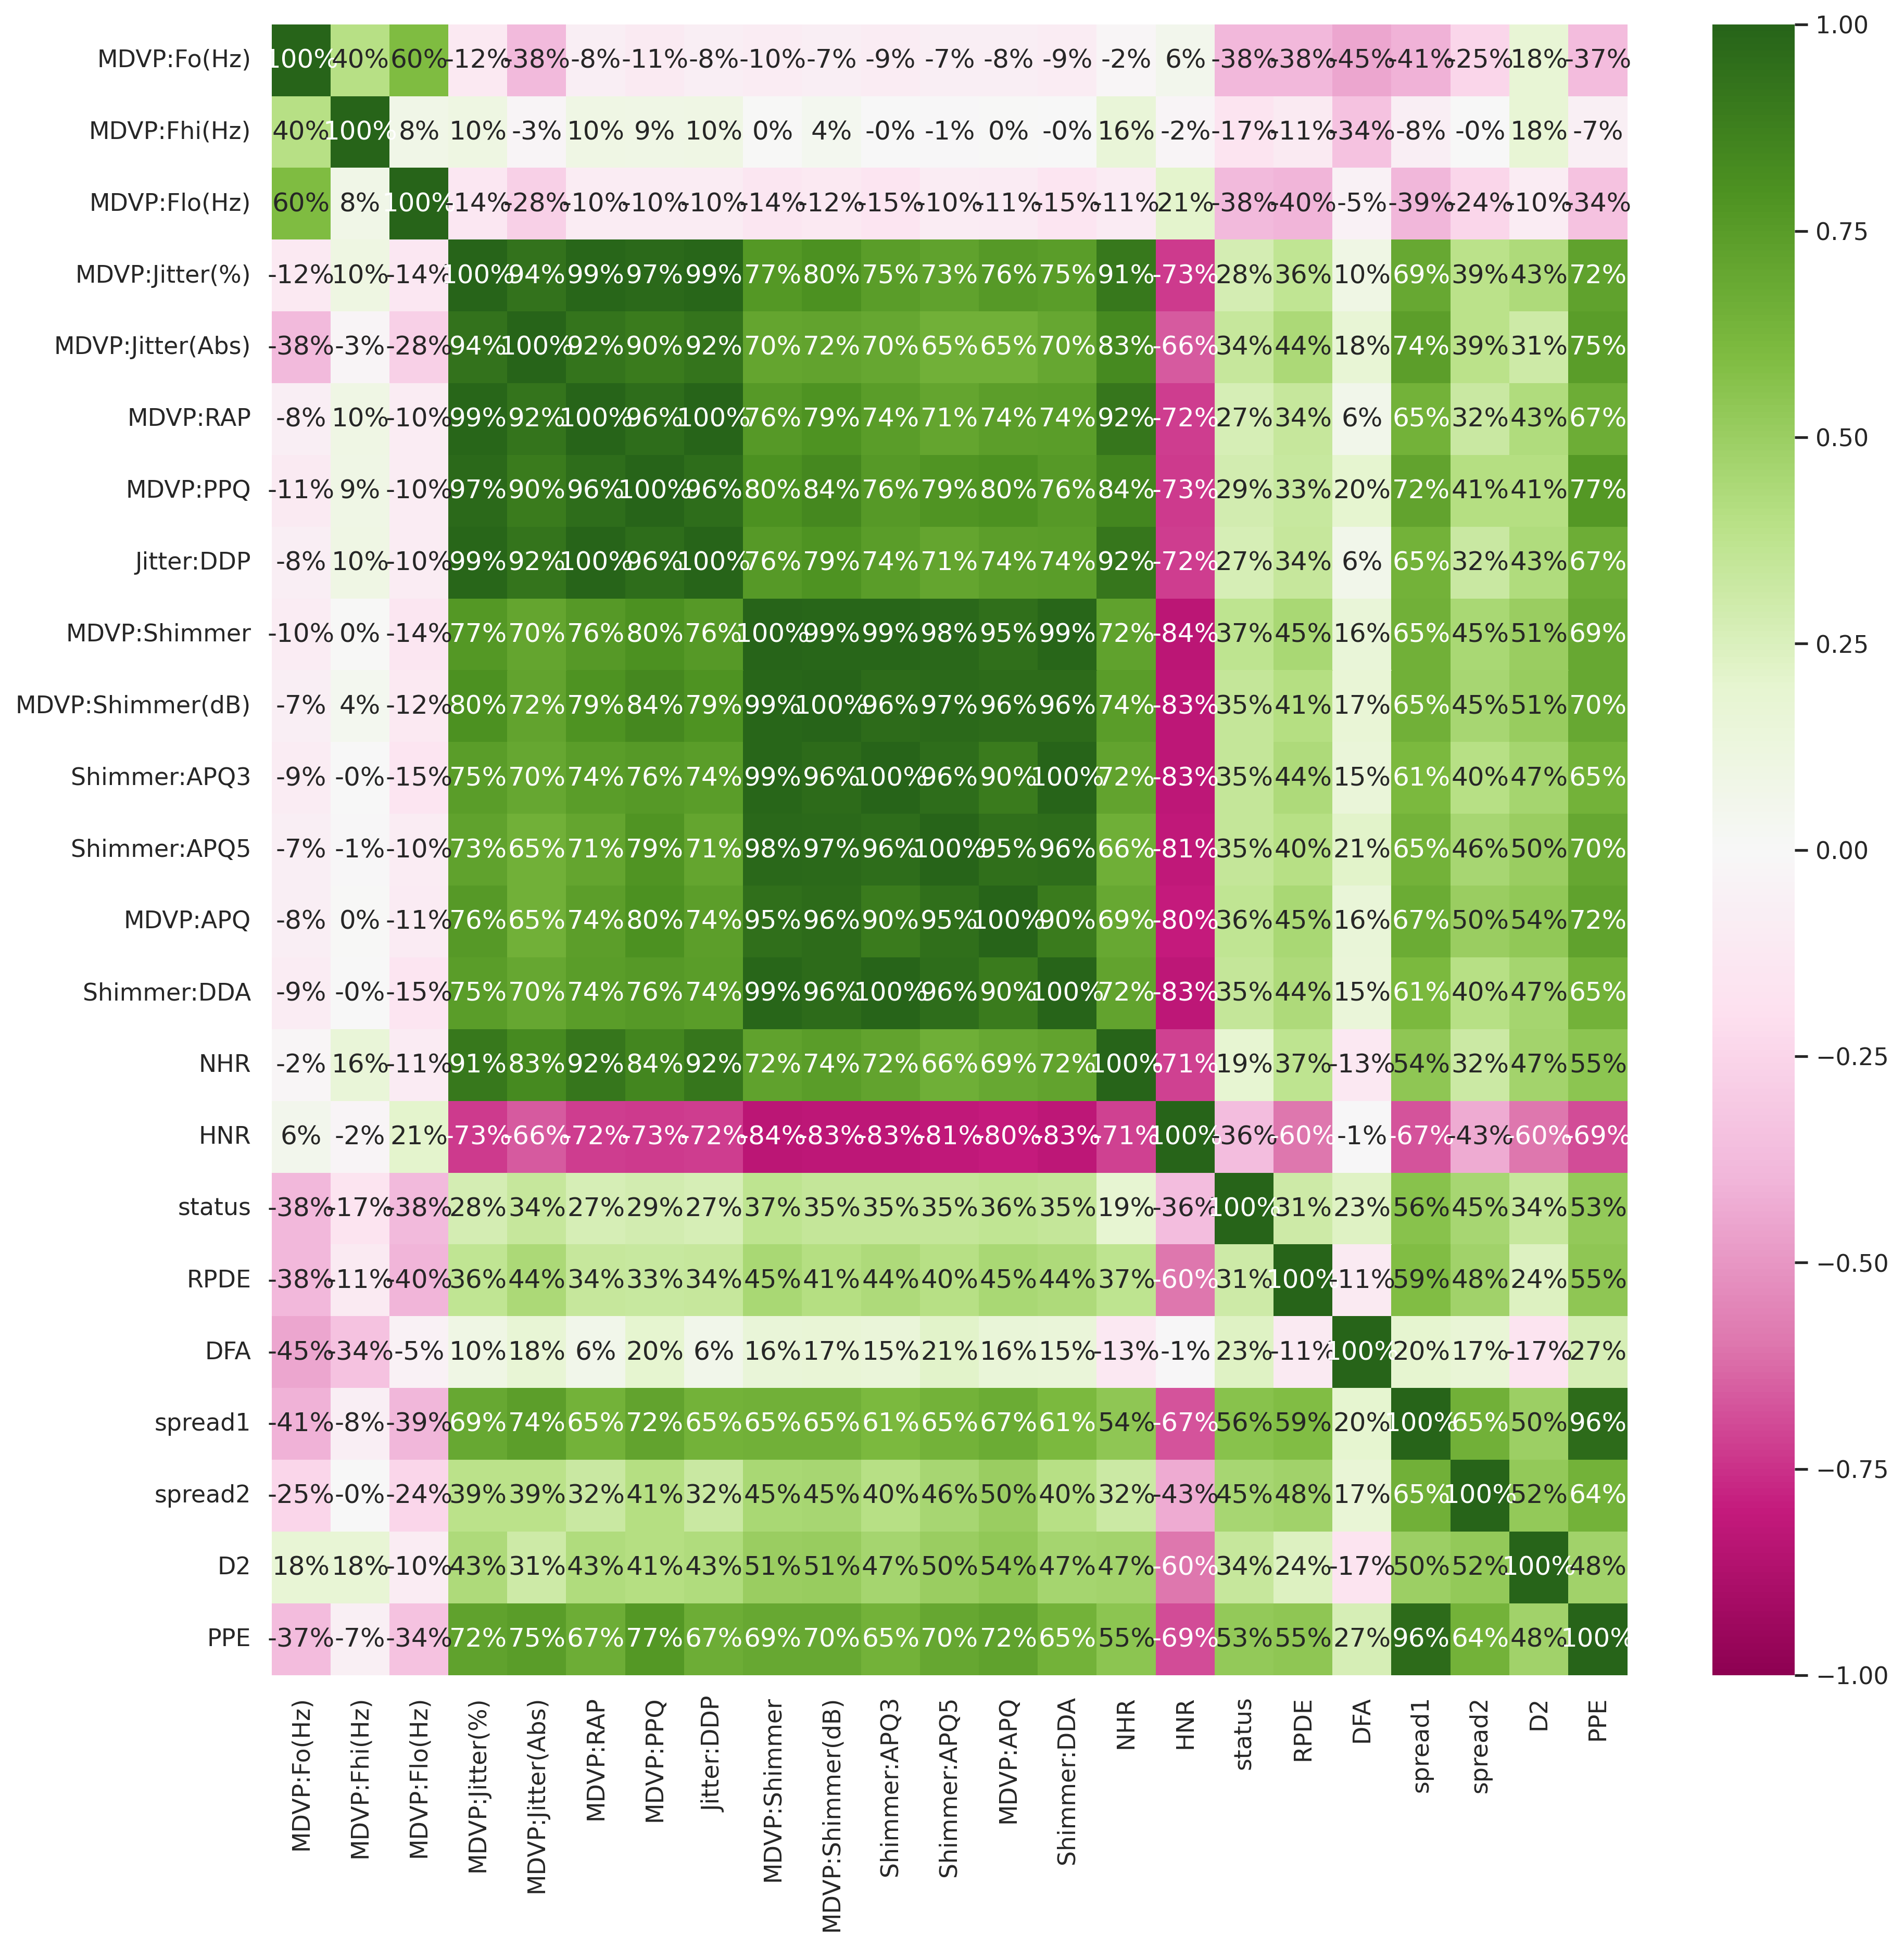

In [52]:
sns.set(font_scale=1.0)
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, robust=True, vmin=-1, vmax=1, fmt = '.0%', cmap="PiYG");

This is a heatmap indicating the percentage of correlation among each columns.

# Seperating target column

In [53]:
X = df.drop(["name", "status"], axis=1)
y = df["status"]

In [54]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [55]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

## Splitting data into train and test data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [57]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
174,117.004,144.466,99.923,0.00353,0.00003,0.00176,0.00218,0.00528,0.01657,0.145,0.00881,0.01062,0.01318,0.02643,0.00590,25.445,0.387482,0.756482,-6.012559,0.229298,1.872946,0.163118
20,153.848,165.738,65.782,0.00840,0.00005,0.00428,0.00450,0.01285,0.03810,0.328,0.01667,0.02383,0.04055,0.05000,0.03871,17.536,0.660125,0.704087,-4.095442,0.262564,2.739710,0.365391
111,208.519,220.315,199.020,0.00609,0.00003,0.00368,0.00339,0.01105,0.01761,0.155,0.00952,0.01058,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
109,193.030,208.900,80.297,0.00766,0.00004,0.00450,0.00389,0.01351,0.03044,0.275,0.01771,0.01815,0.02084,0.05312,0.00947,21.934,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668
55,109.860,126.358,104.437,0.00874,0.00008,0.00398,0.00539,0.01193,0.03209,0.307,0.01789,0.01992,0.02454,0.05368,0.01180,20.767,0.558586,0.811843,-4.333543,0.221727,2.014606,0.344834


In [58]:
y_train.head()

174    0
20     1
111    1
109    1
55     1
Name: status, dtype: int64

In [59]:
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
83,98.804,102.305,87.804,0.00432,0.00004,0.00247,0.00258,0.00742,0.02223,0.202,0.01277,0.01343,0.01552,0.03831,0.00882,22.244,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275
107,151.884,157.765,133.751,0.00258,0.00002,0.00115,0.00122,0.00346,0.01450,0.137,0.00633,0.00788,0.01267,0.01898,0.00659,26.833,0.393563,0.700246,-6.600023,0.249172,2.499148,0.105306
50,124.445,135.069,117.495,0.00431,0.00003,0.00141,0.00167,0.00422,0.02184,0.197,0.01241,0.01024,0.01685,0.03724,0.00479,25.135,0.553134,0.775933,-6.650471,0.254498,1.840198,0.103561
23,173.917,192.735,86.180,0.00476,0.00003,0.00221,0.00258,0.00663,0.04192,0.364,0.02187,0.02470,0.03772,0.06562,0.01840,20.422,0.537264,0.686894,-5.248776,0.210279,2.547508,0.253556
116,158.219,442.557,71.948,0.00476,0.00003,0.00214,0.00207,0.00642,0.01458,0.148,0.00606,0.00747,0.01312,0.01818,0.01554,26.356,0.450798,0.653823,-6.051233,0.273280,2.640798,0.170106


In [60]:
y_test.head()

83     1
107    1
50     0
23     1
116    1
Name: status, dtype: int64

##### "X_train" represents training data and "X_test" represents test data. "y_train" represents outcome (status like person have parkinsons disease or not) of training data while "y_test" represents outcome (status like person have parkinsons disease or not) of test data.

In [61]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (136, 22)
Shape of y_train: (136,)
Shape of X_test: (59, 22)
Shape of y_test: (59,)


# Normalization && Class weights :

In [62]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train) 
class_weights = dict(enumerate(class_weights))                                          

# Model Building && Validation

## Logistic Regression

In [63]:
# Hyperparameters tuning 

model = LogisticRegression(class_weight = class_weights) 

param_grid = {
    
    "C": [100,10,1.0,0.1,0.01],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

result=grid_search.fit(X_train, y_train)

print('Best: %f using %s' % (result.best_score_, result.best_params_))

Best: 0.882804 using {'C': 100}


In [64]:
# use best Hyperparameters and make cross validation

lr = LogisticRegression(class_weight = class_weights, C = 100, random_state = 42) 

k  = 10
scores = cross_val_score(lr, X_train, y_train, cv=k)
print(f'Accuracy score for {k} folds :', scores)
print(f'Mean score:', scores.mean())

Accuracy score for 10 folds : [0.78571429 0.85714286 0.64285714 0.78571429 0.92857143 0.92857143
 1.         1.         0.84615385 0.84615385]
Mean score: 0.862087912087912


In [65]:
# classification_report
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67        15
           1       0.92      0.80      0.85        44

    accuracy                           0.80        59
   macro avg       0.75      0.80      0.76        59
weighted avg       0.83      0.80      0.81        59



##### Accuracy = Proportion of correct prediction over total prediction
##### When a person have Parkinsons disease, how often does my classifier predict that correctly? This measurement is called “recall”
##### Recall = Out of actual positive(True positive + False negative), how many are True positive
##### Precision Out of predicted positive (true positive + False positive), how many are True positive

### Confusion matrix of Logistic regression model

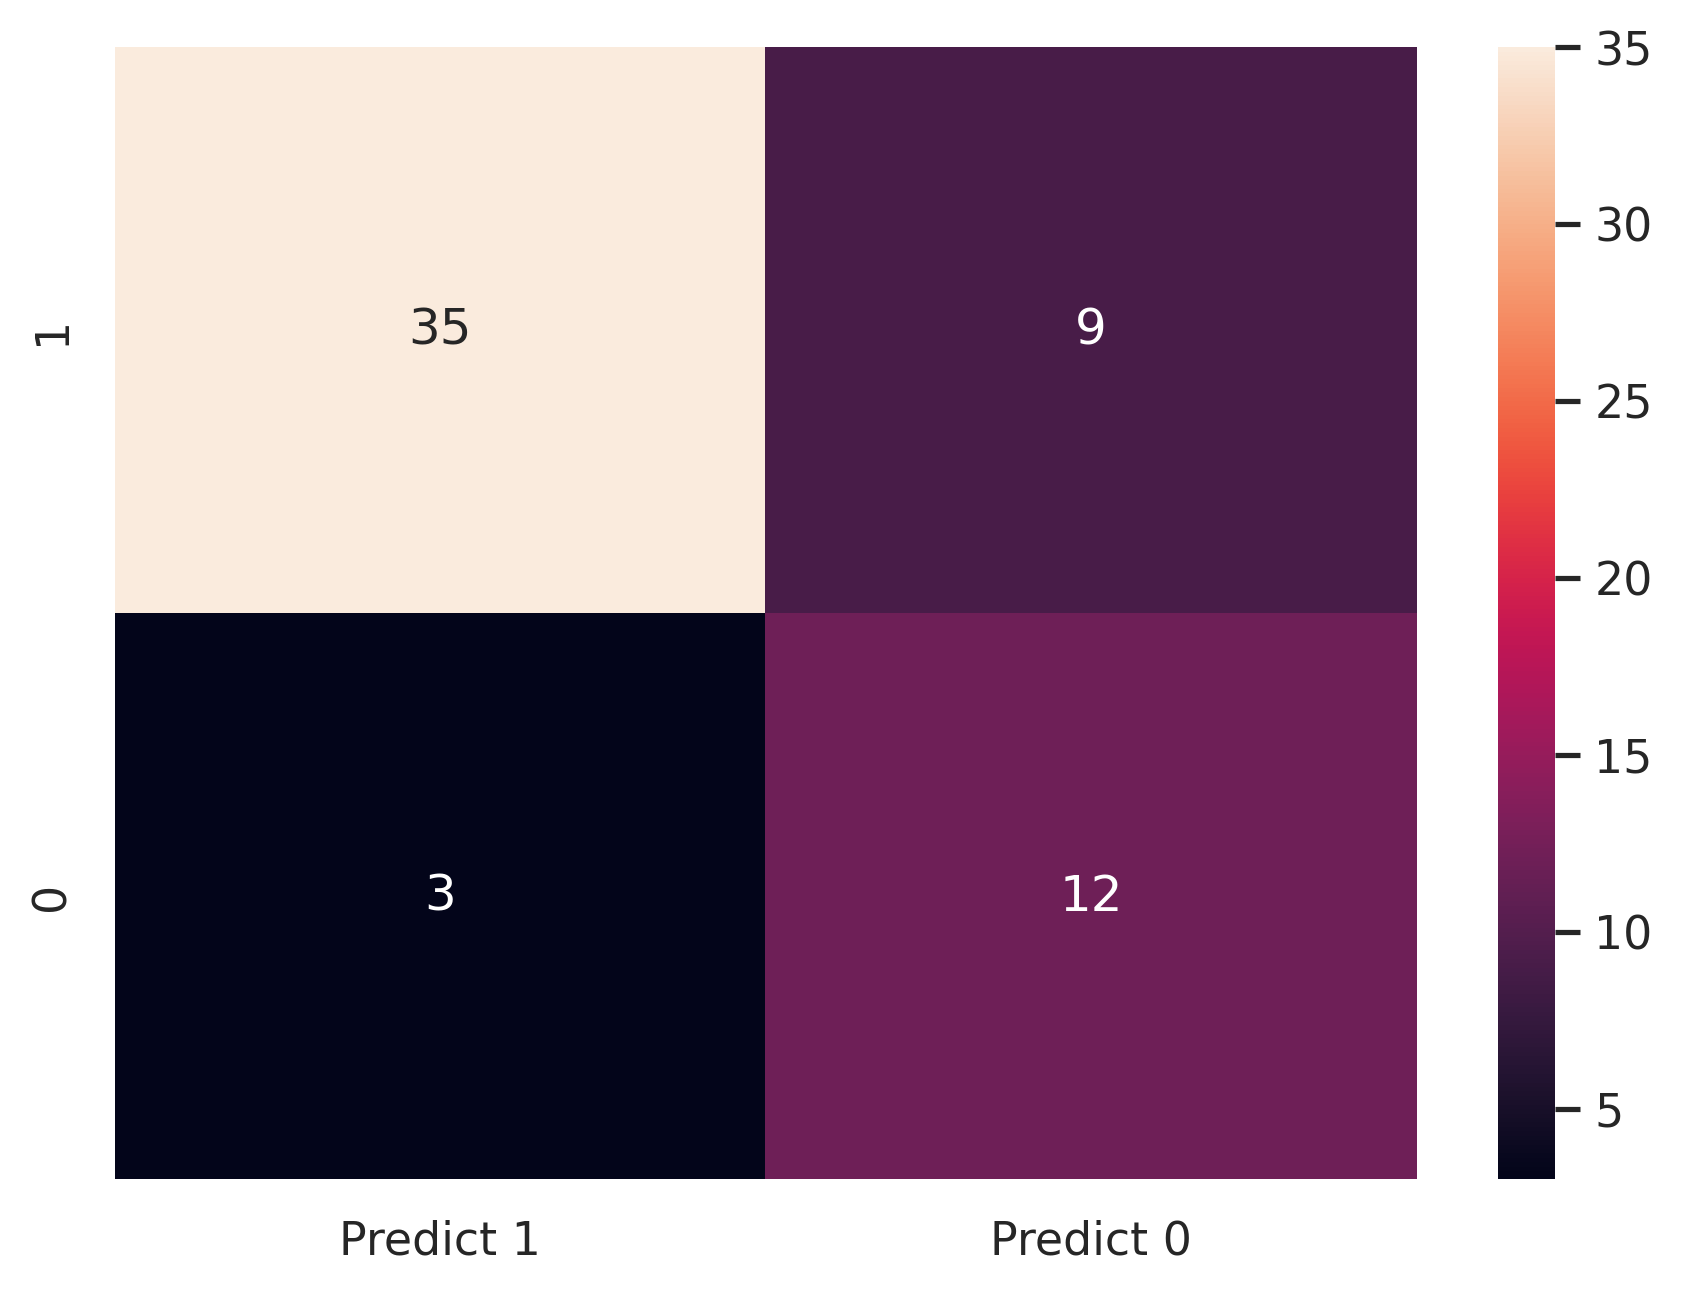

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))                        
sns.heatmap(df_cm, annot=True, fmt='g');

### AUC of Logistic regression model

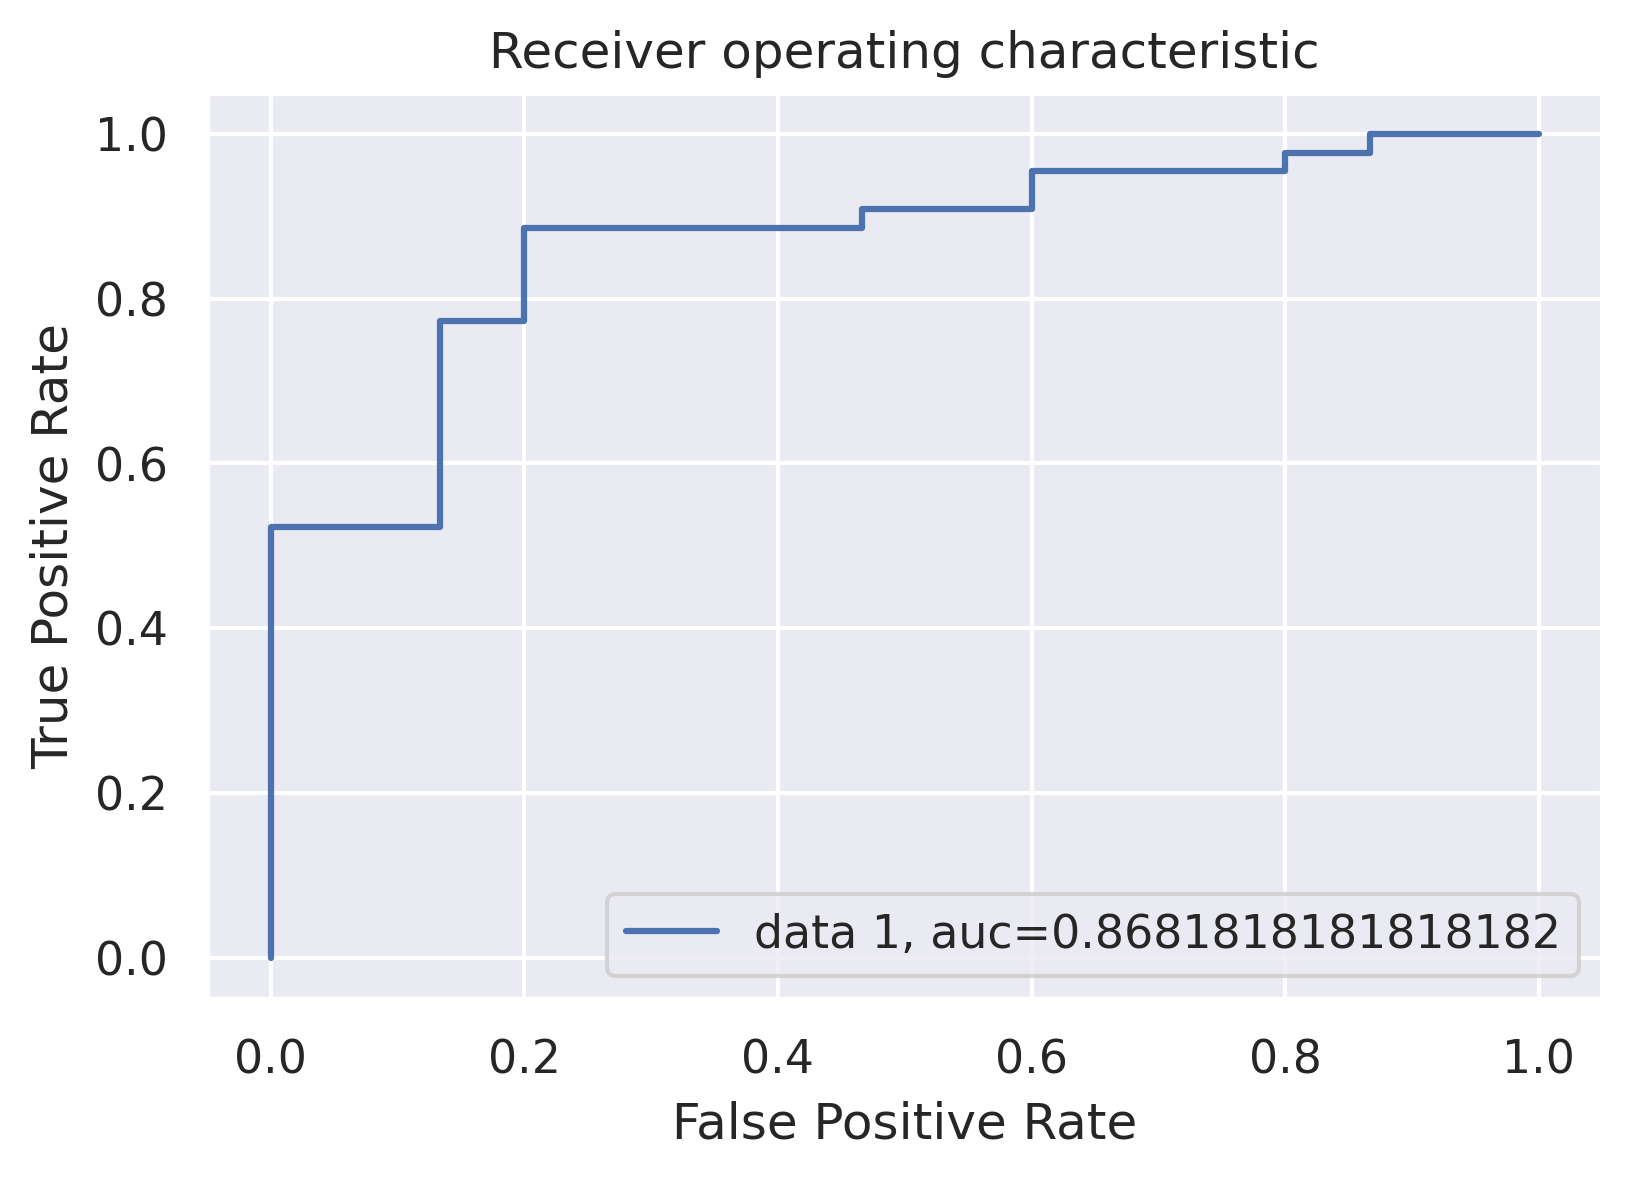

In [67]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

## SVM

In [68]:
model = SVC(class_weight = class_weights) 

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

result=grid_search.fit(X_train, y_train)

print('Best: %f using %s' % (result.best_score_, result.best_params_))

Best: 0.933862 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [69]:
# use best Hyperparameters and make cross validation

svm = SVC(class_weight = class_weights, C = 10, gamma=.1, kernel='rbf',probability=True, random_state = 42) 

k  = 10
scores = cross_val_score(svm, X_train, y_train, cv=k)
print(f'Accuracy score for {k} folds :', scores)
print(f'Mean score:', scores.mean())

Accuracy score for 10 folds : [0.92857143 0.92857143 1.         0.92857143 0.78571429 1.
 0.92307692 0.92307692 1.         0.92307692]
Mean score: 0.9340659340659341


In [70]:
# classification_report
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.95        44

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.88        59
weighted avg       0.92      0.92      0.91        59



### Confusion Matrix of SVM

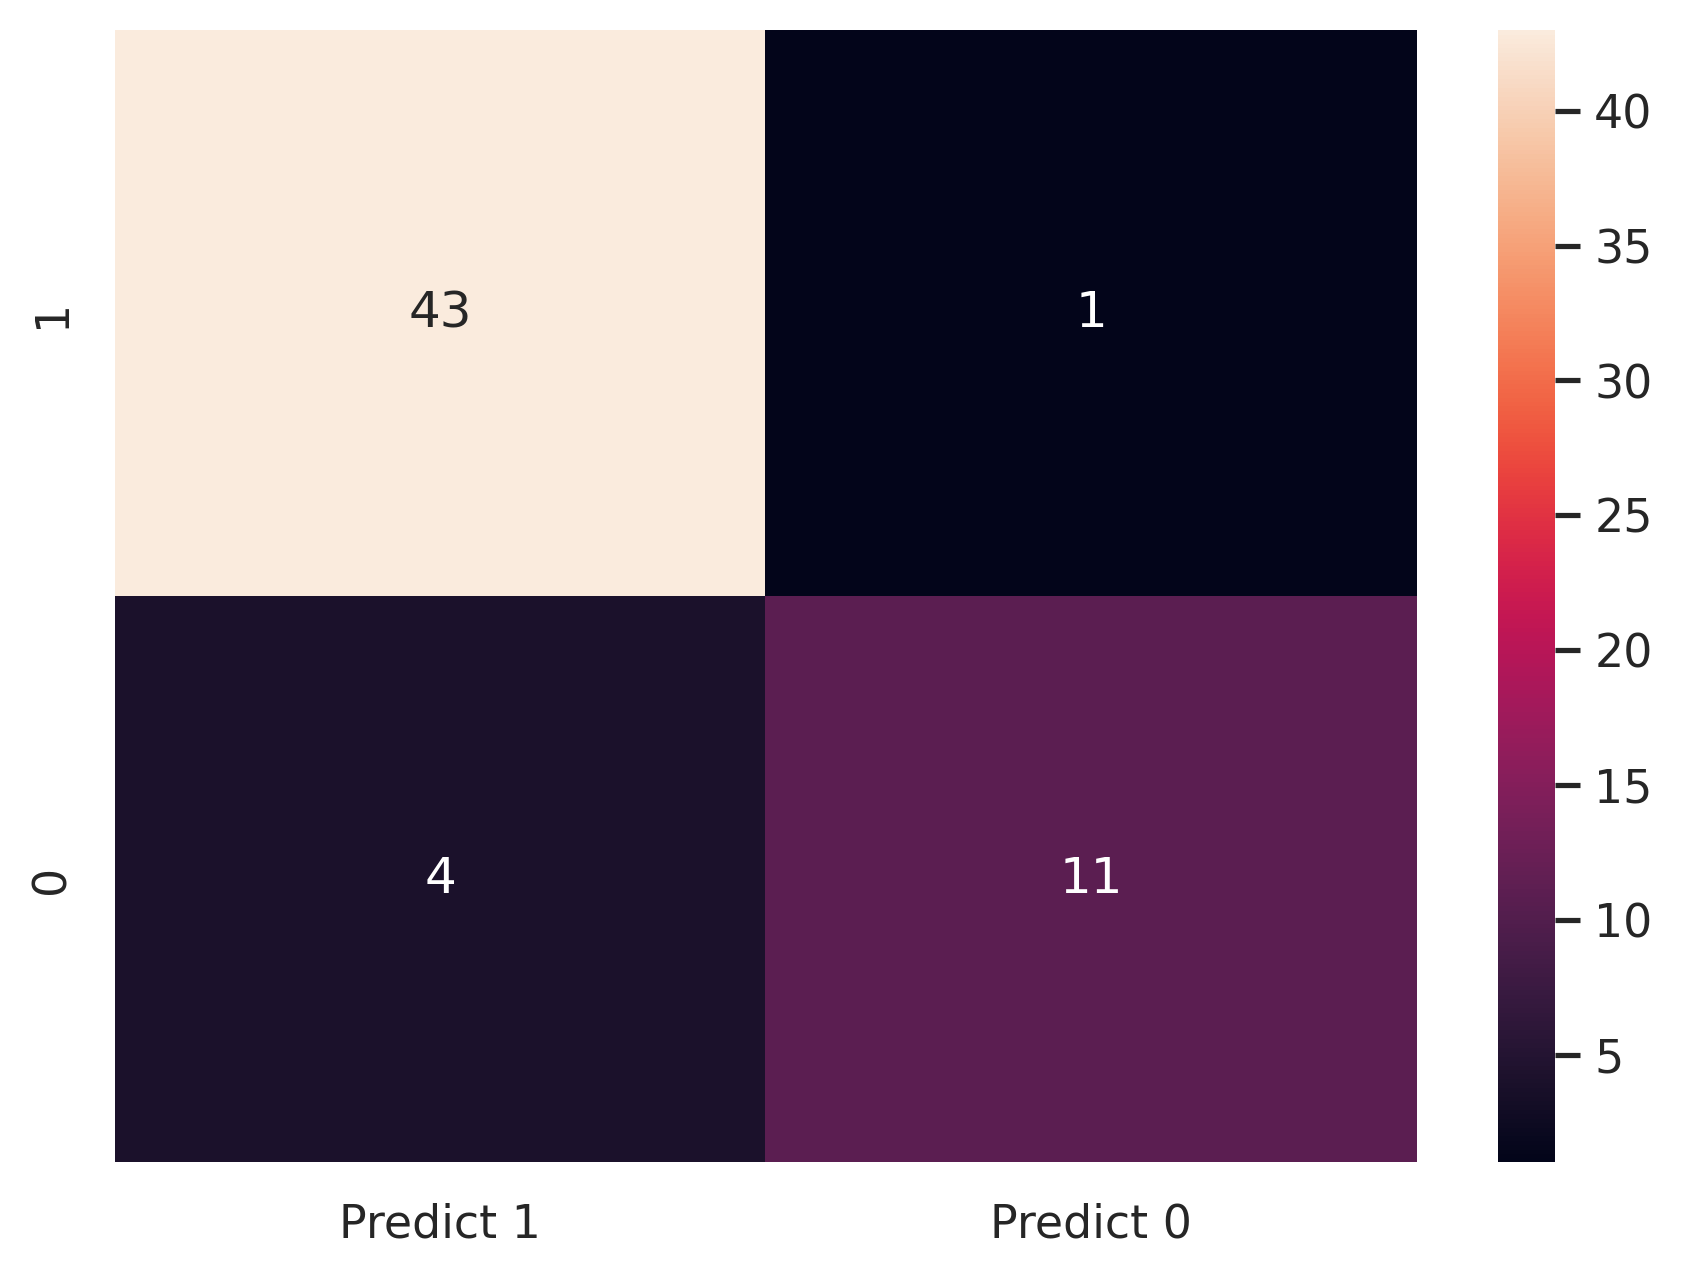

In [71]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

### AUC of SVM

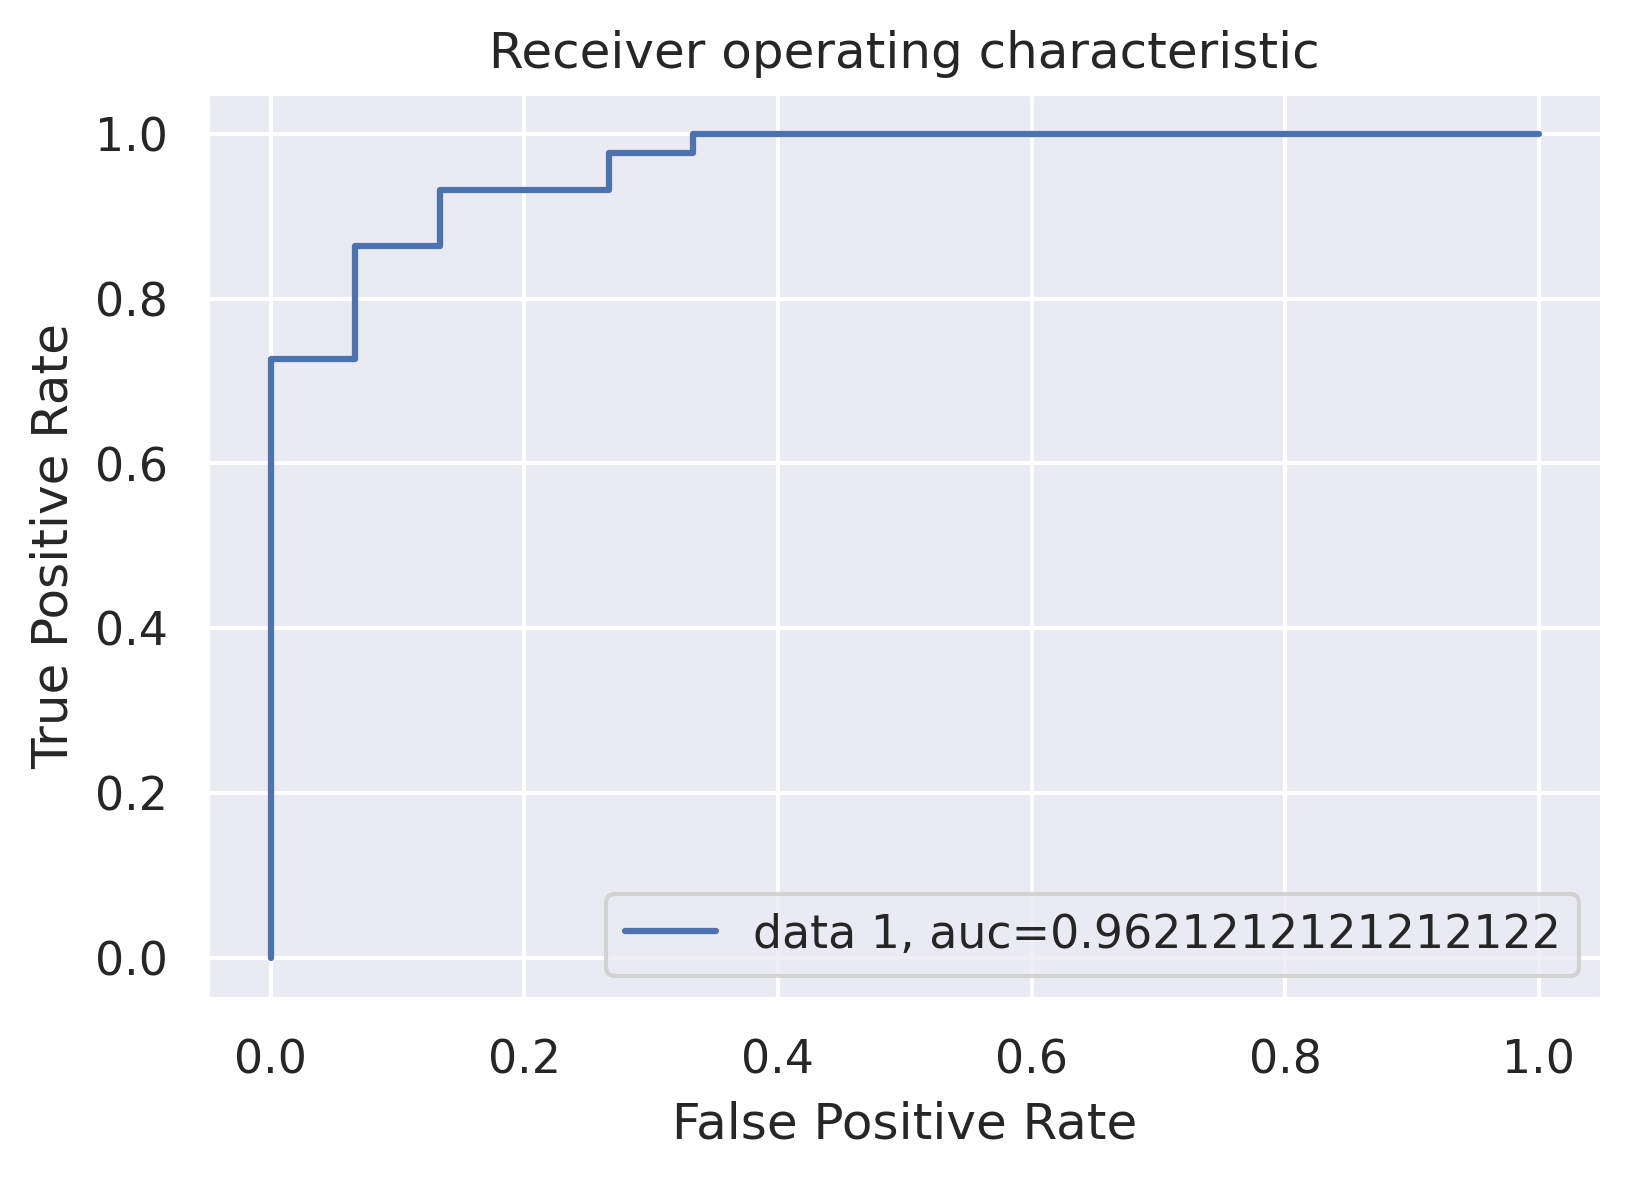

In [72]:
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

## Random forest classifier

In [73]:
# Hyperparameter tuning

model = RandomForestClassifier(class_weight = class_weights) 

param_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400]
 }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

result=grid_search.fit(X_train, y_train)

print('Best: %f using %s' % (result.best_score_, result.best_params_))

Best: 0.904497 using {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [74]:
# use best Hyperparameters and make cross validation

rf = RandomForestClassifier(class_weight = class_weights, max_depth= 20, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200, random_state = 42) 

k  = 10
scores = cross_val_score(rf, X_train, y_train, cv=k)
print(f'Accuracy score for {k} folds :', scores)
print(f'Mean score:', scores.mean())

Accuracy score for 10 folds : [0.78571429 0.78571429 0.85714286 0.85714286 0.85714286 0.92857143
 0.92307692 1.         0.84615385 0.76923077]
Mean score: 0.8609890109890109


In [75]:
# classification_report
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.93      0.93      0.93        44

    accuracy                           0.90        59
   macro avg       0.87      0.87      0.87        59
weighted avg       0.90      0.90      0.90        59



### Confusion matrix of Random Forest Classifier Model

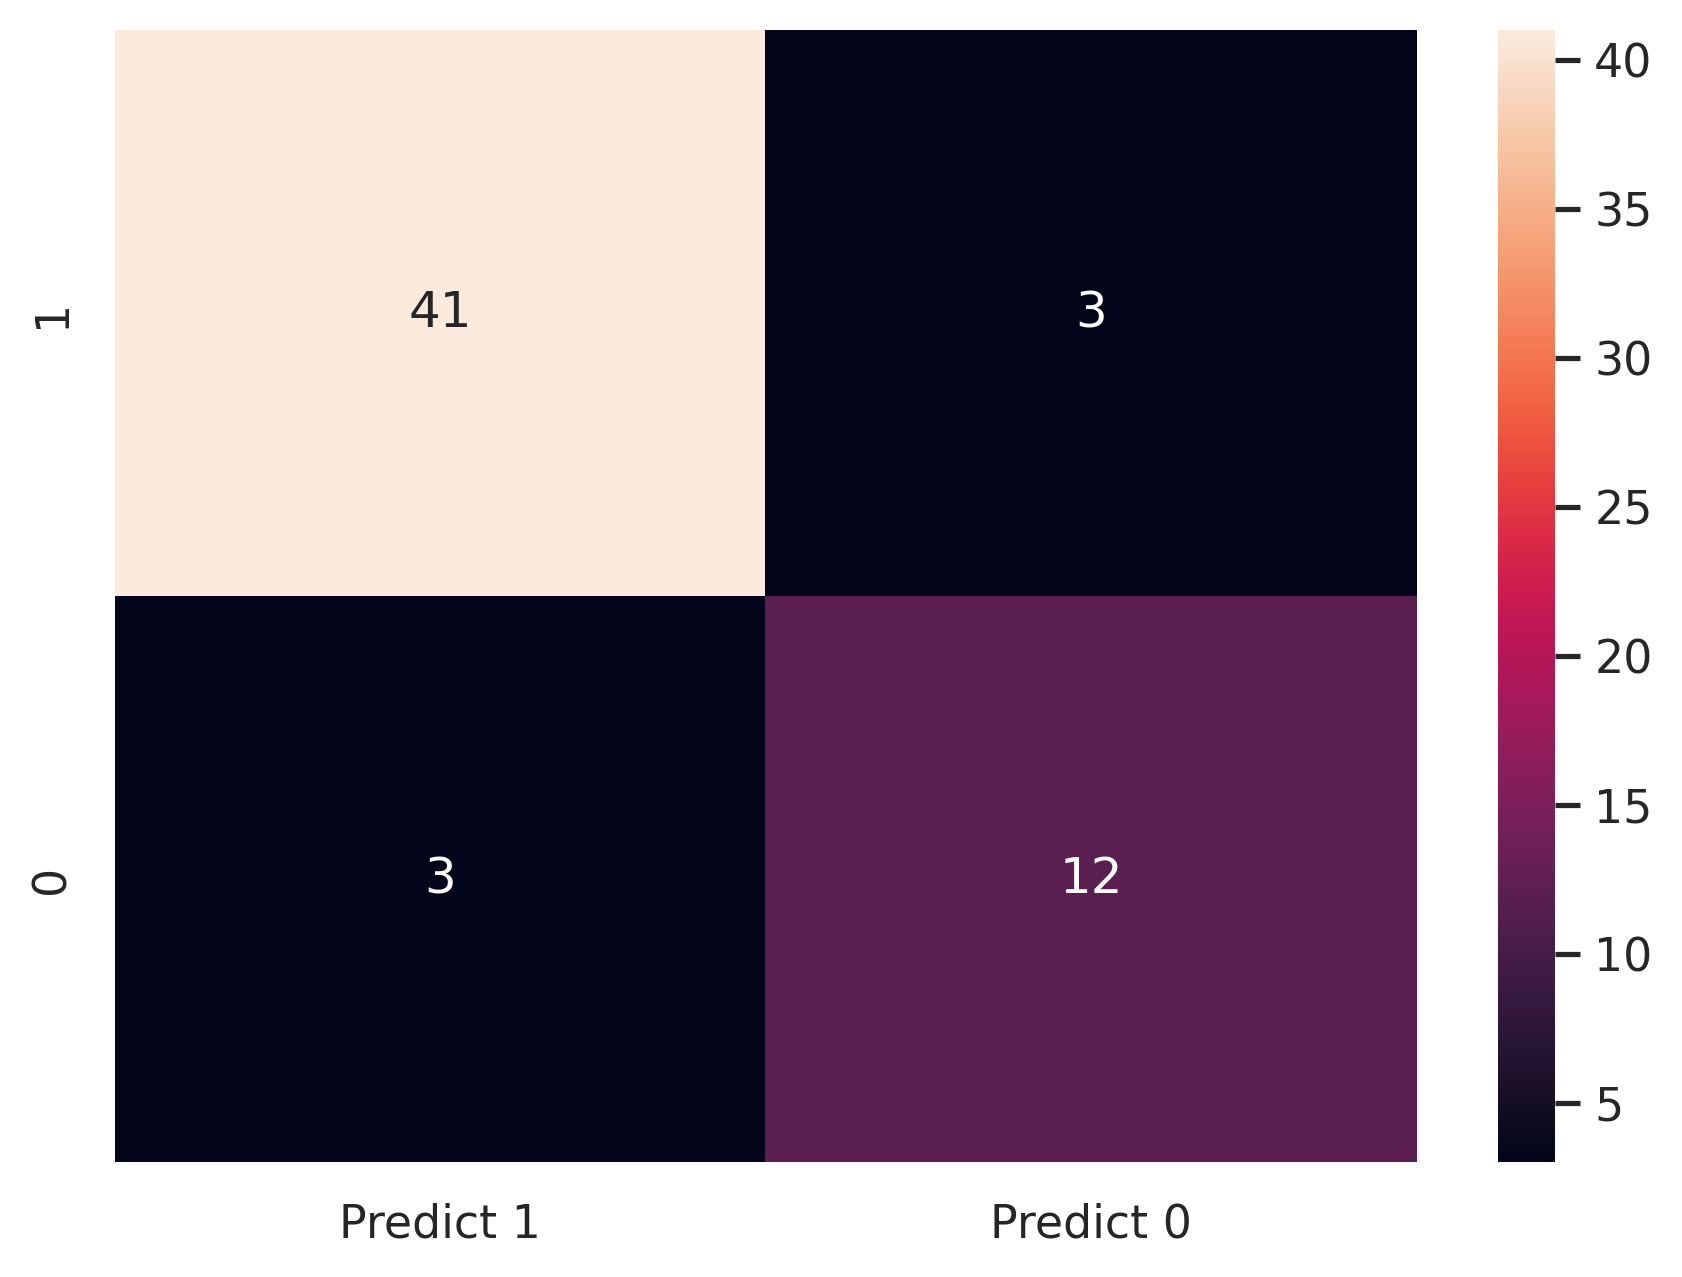

In [76]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

### AUC of Random Forest Classifier Model

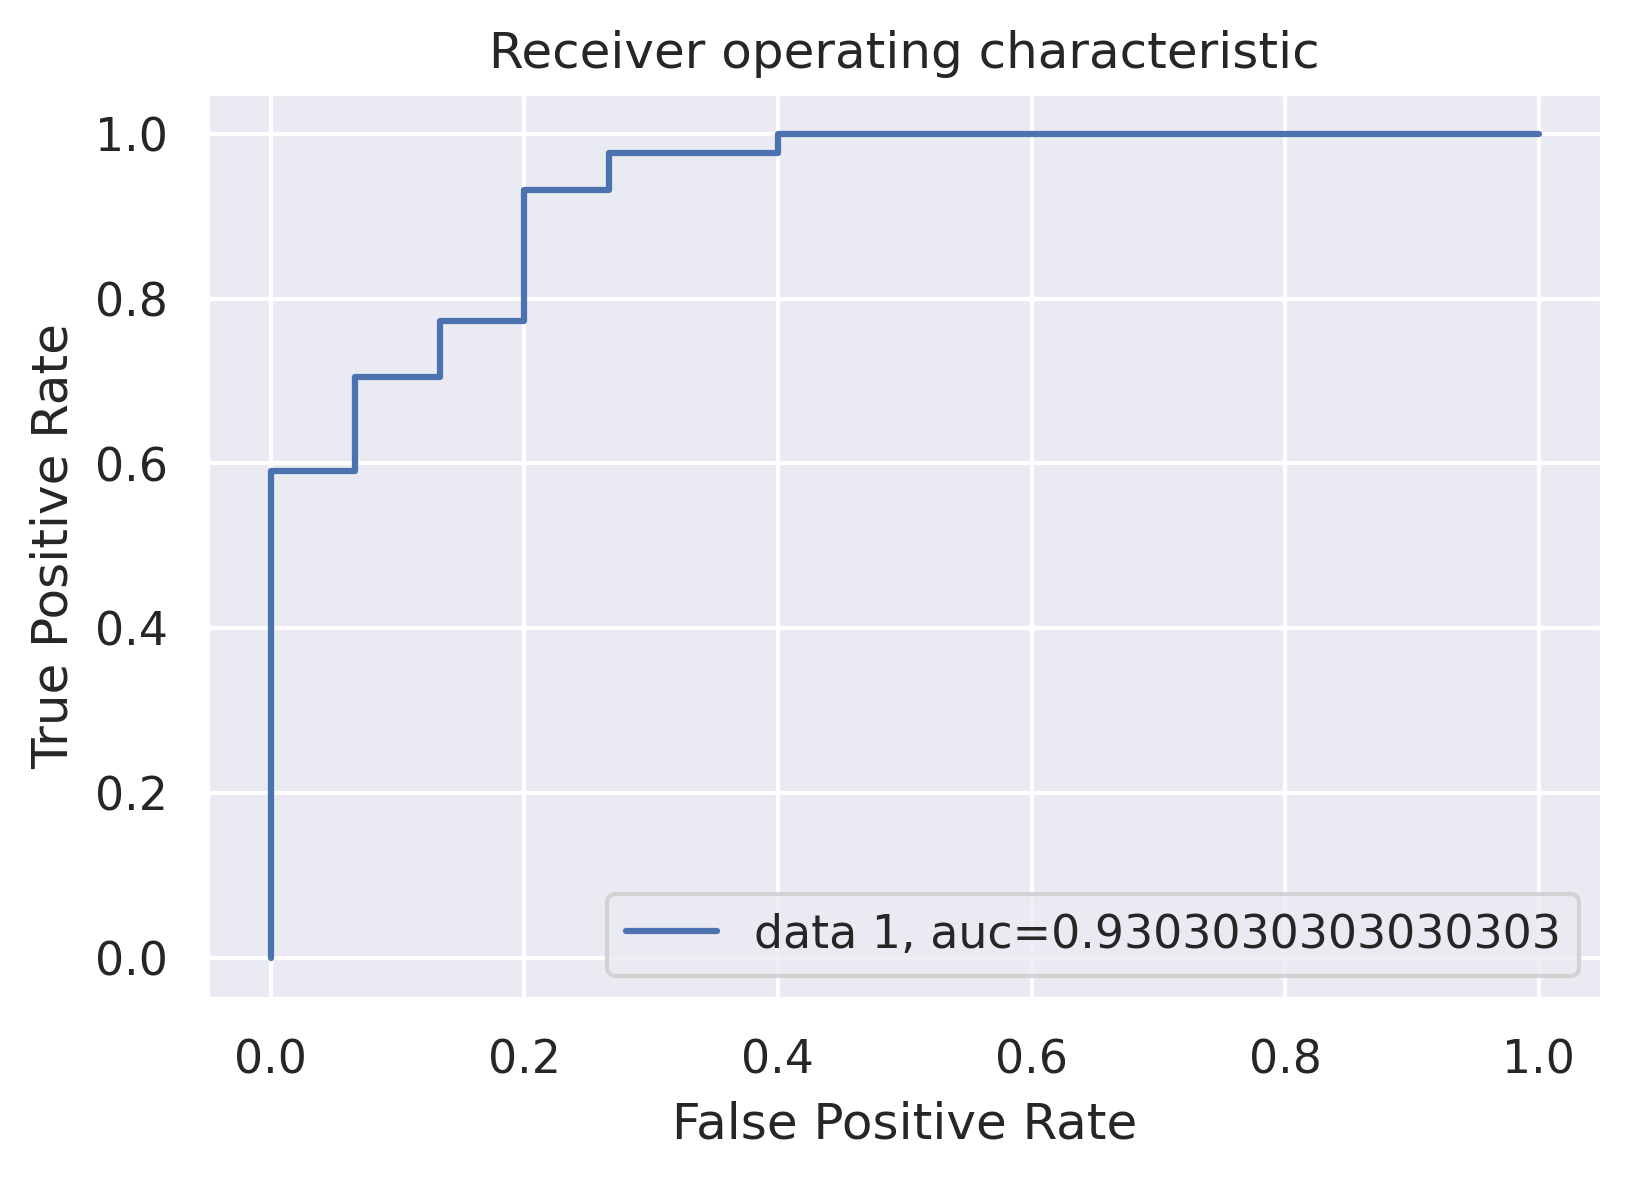

In [77]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

## XGBoost Model

In [78]:
# Hyperparameter tuning

model = XGBClassifier(class_weight = class_weights) 

param_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

result=grid_search.fit(X_train, y_train)

print('Best: %f using %s' % (result.best_score_, result.best_params_))

Best: 0.911905 using {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 800}


In [79]:
# use best Hyperparameters and make cross validation

xgb = XGBClassifier(class_weight = class_weights, learning_rate=.05, max_depth=6, min_child_weight=1, n_estimators=800, random_state = 42) 

k  = 10
scores = cross_val_score(xgb, X_train, y_train, cv=k)
print(f'Accuracy score for {k} folds :', scores)
print(f'Mean score:', scores.mean())

Accuracy score for 10 folds : [0.85714286 0.85714286 0.92857143 0.92857143 0.92857143 0.92857143
 1.         1.         0.76923077 0.84615385]
Mean score: 0.9043956043956045


In [80]:
# classification_report
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



### Confusion Matrix of XGBoost

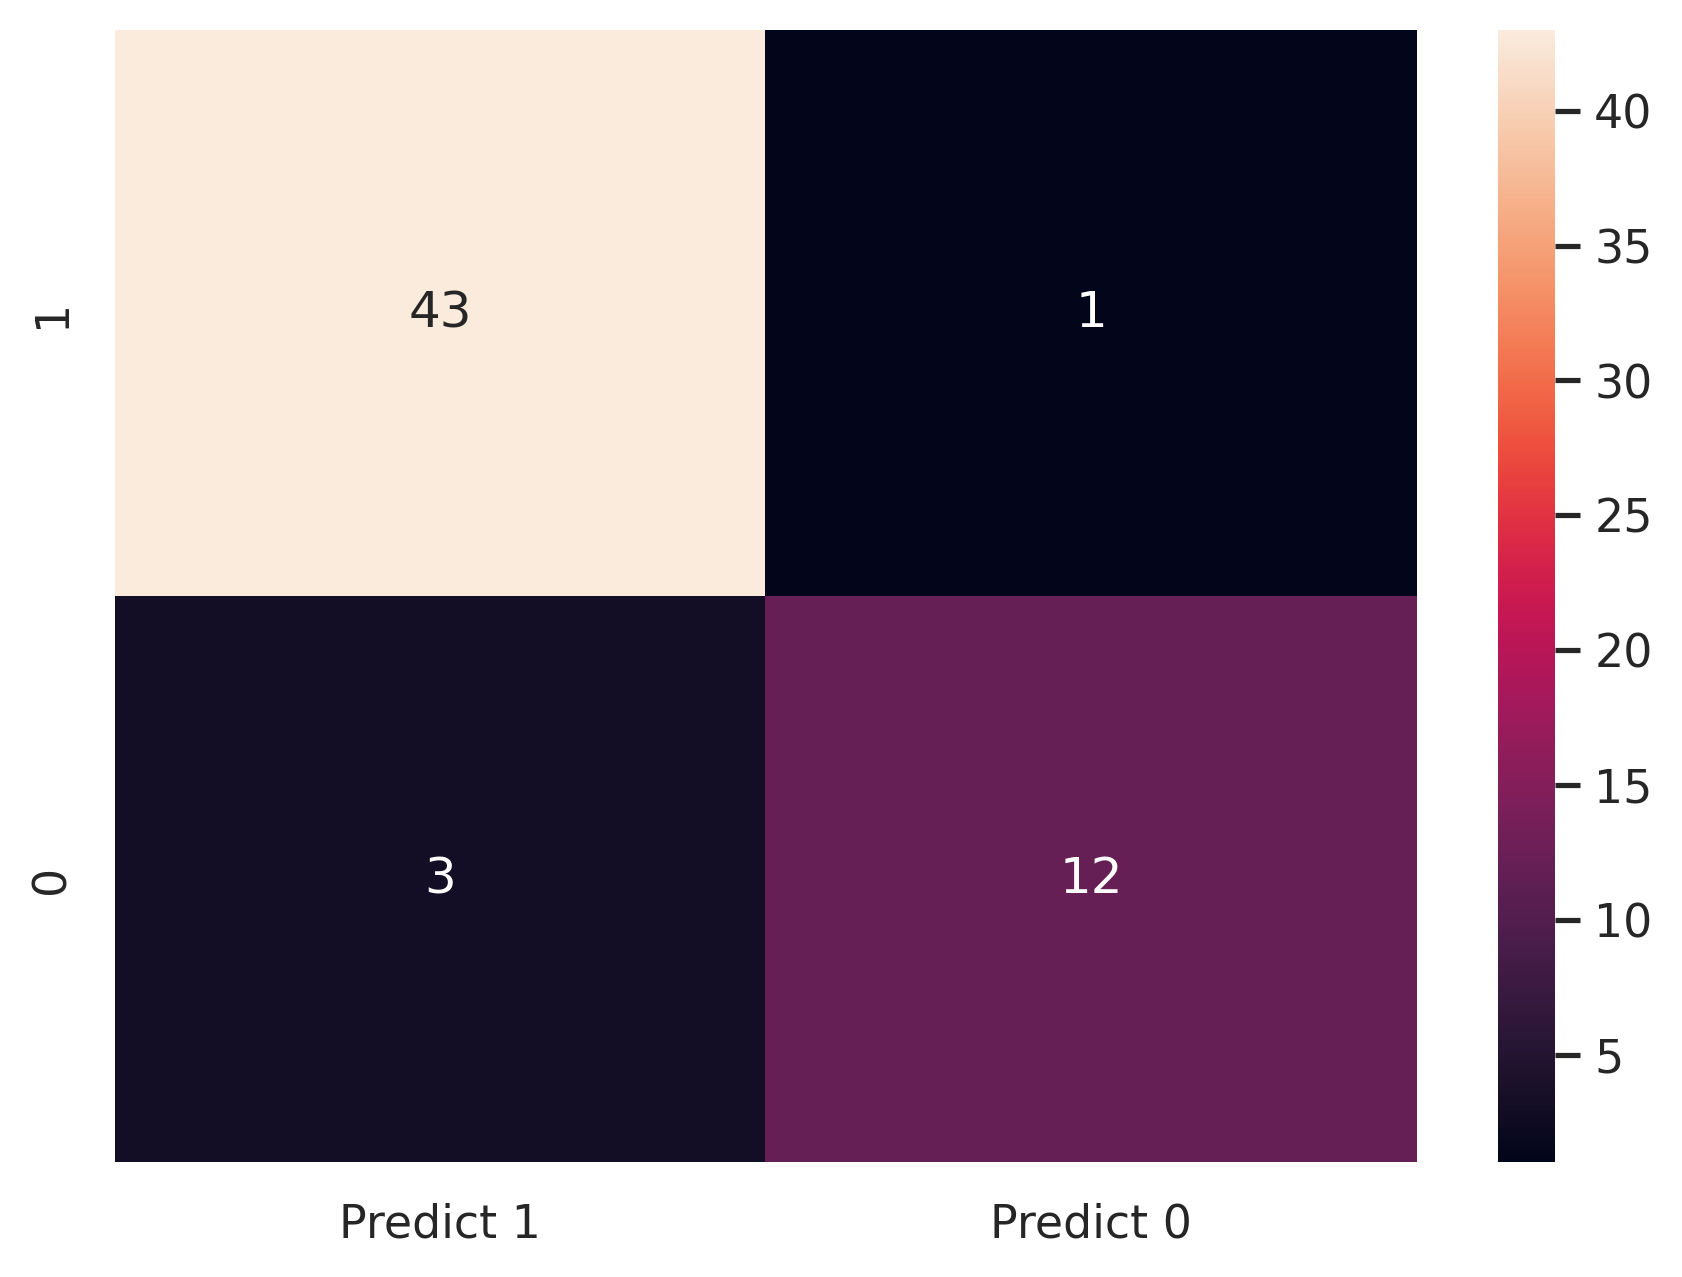

In [81]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

### AUC of XGBoost

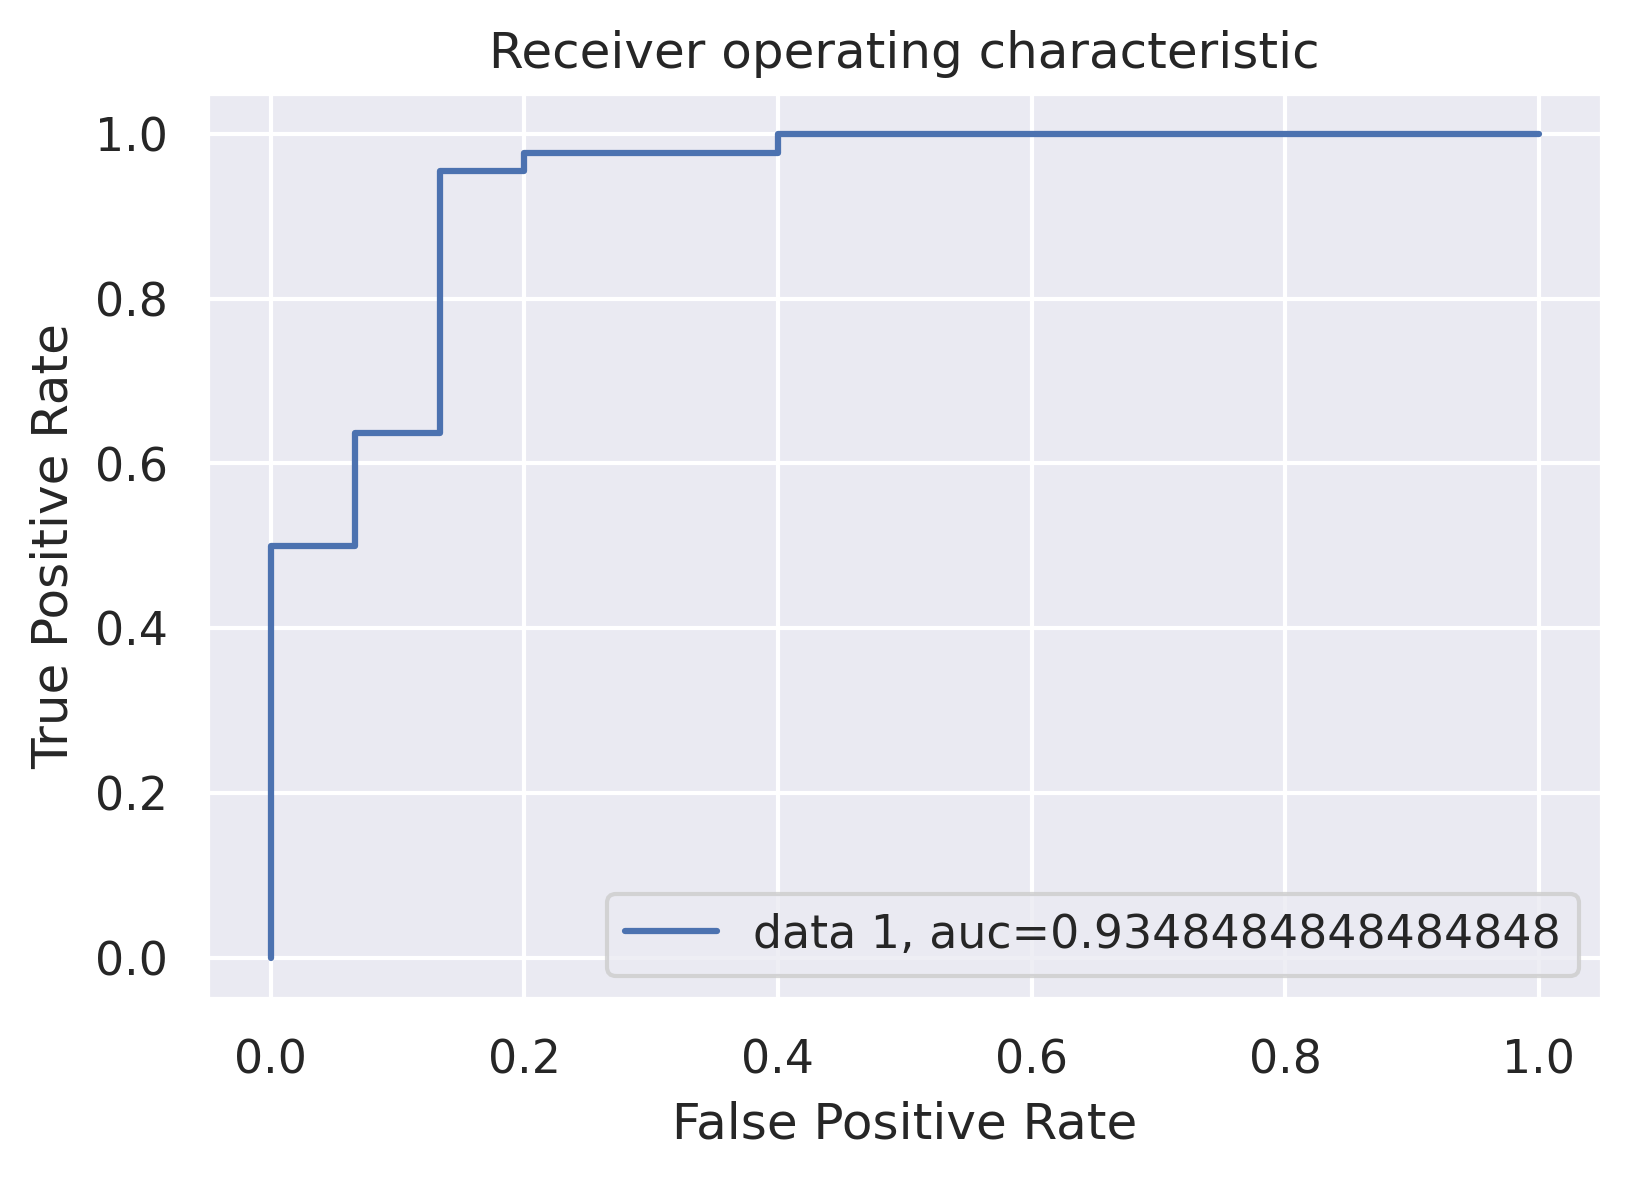

In [82]:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

## kNN

In [83]:
# Hyperparameter tuning

model = KNeighborsClassifier() 

param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

result=grid_search.fit(X_train, y_train)

print('Best: %f using %s' % (result.best_score_, result.best_params_))

Best: 0.904762 using {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


In [96]:
# use best Hyperparameters and make cross validation

knn = KNeighborsClassifier(metric='minkowski',n_neighbors=5, weights='distance') 

k  = 10
scores = cross_val_score(knn, X_train, y_train, cv=k)
print(f'Accuracy score for {k} folds :', scores)
print(f'Mean score:', scores.mean())

Accuracy score for 10 folds : [0.85714286 0.92857143 0.92857143 0.92857143 0.85714286 1.
 0.92307692 0.92307692 1.         0.92307692]
Mean score: 0.926923076923077


In [97]:
# classification_report
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



### Confusion matrix of kNN

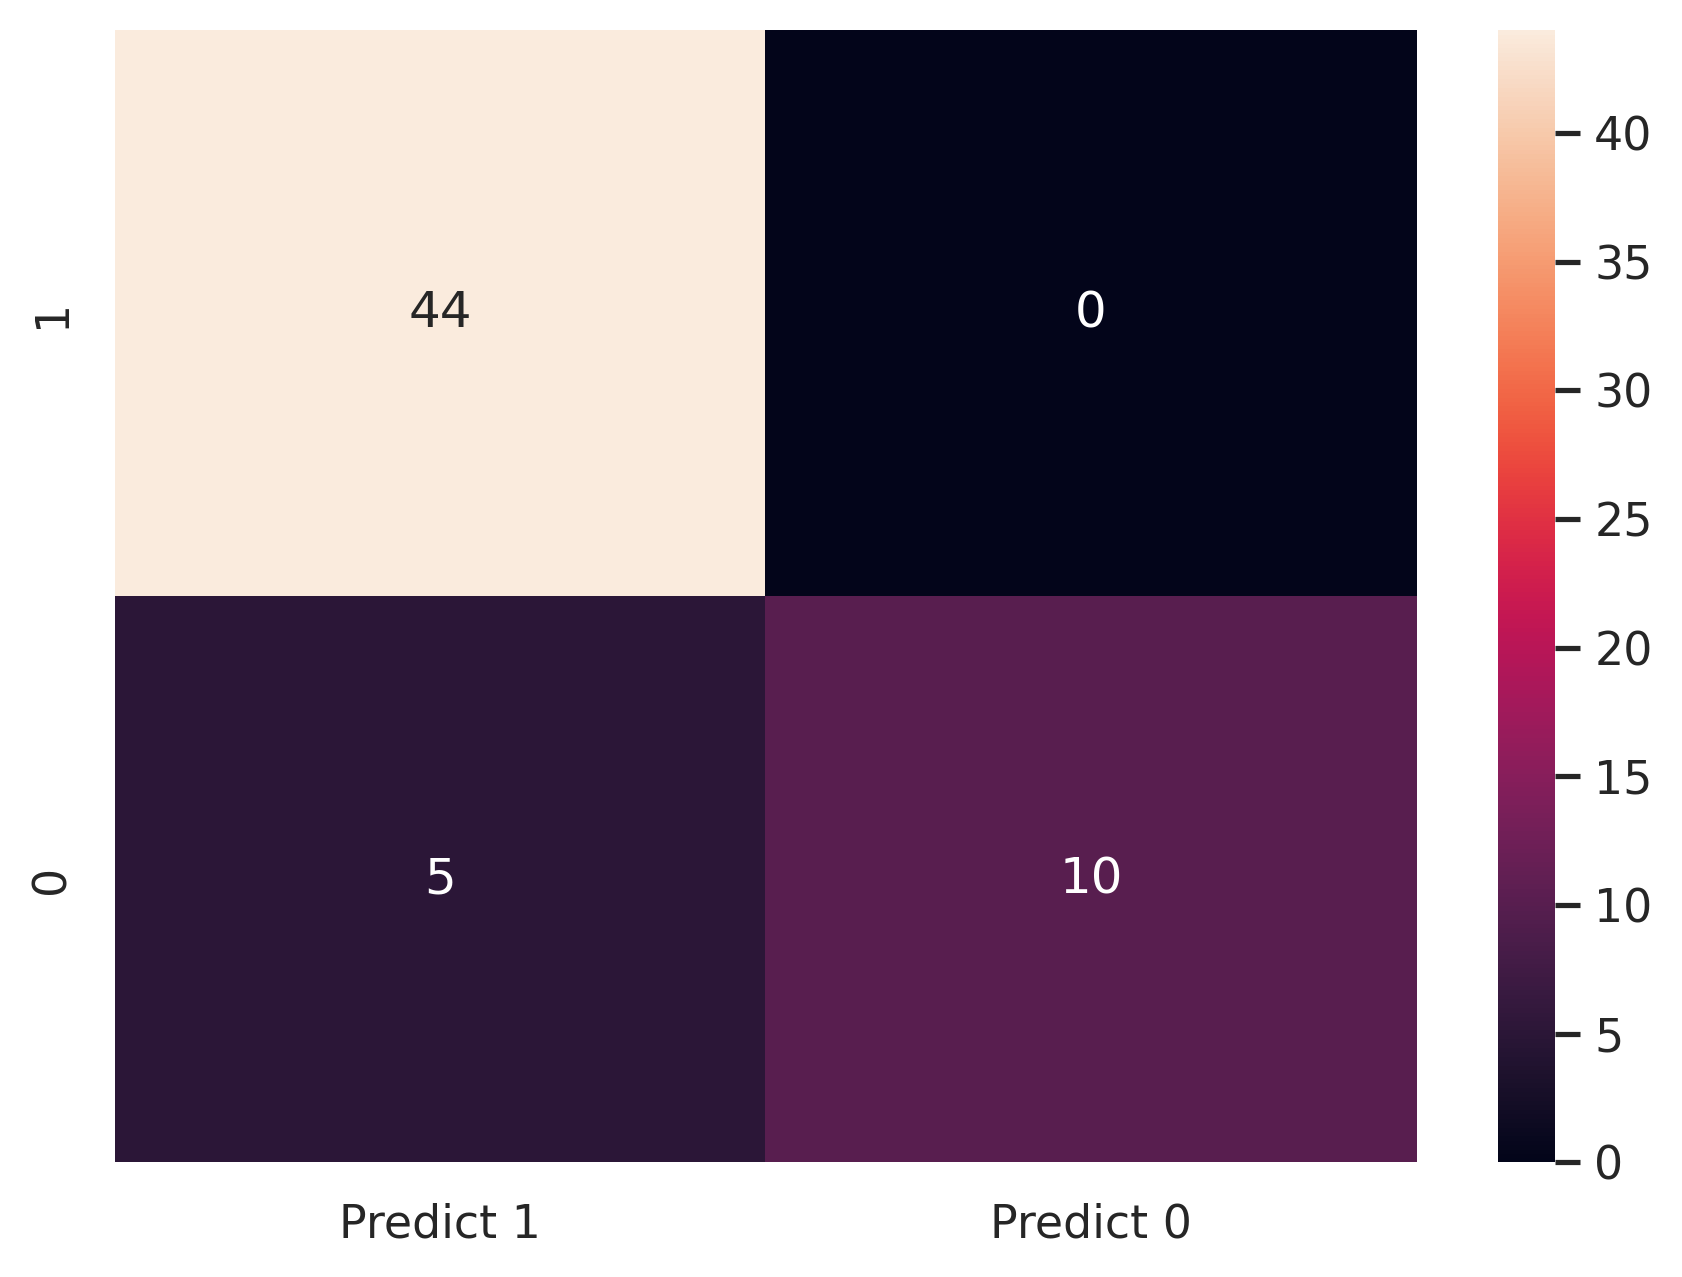

In [98]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

### AUC of kNN

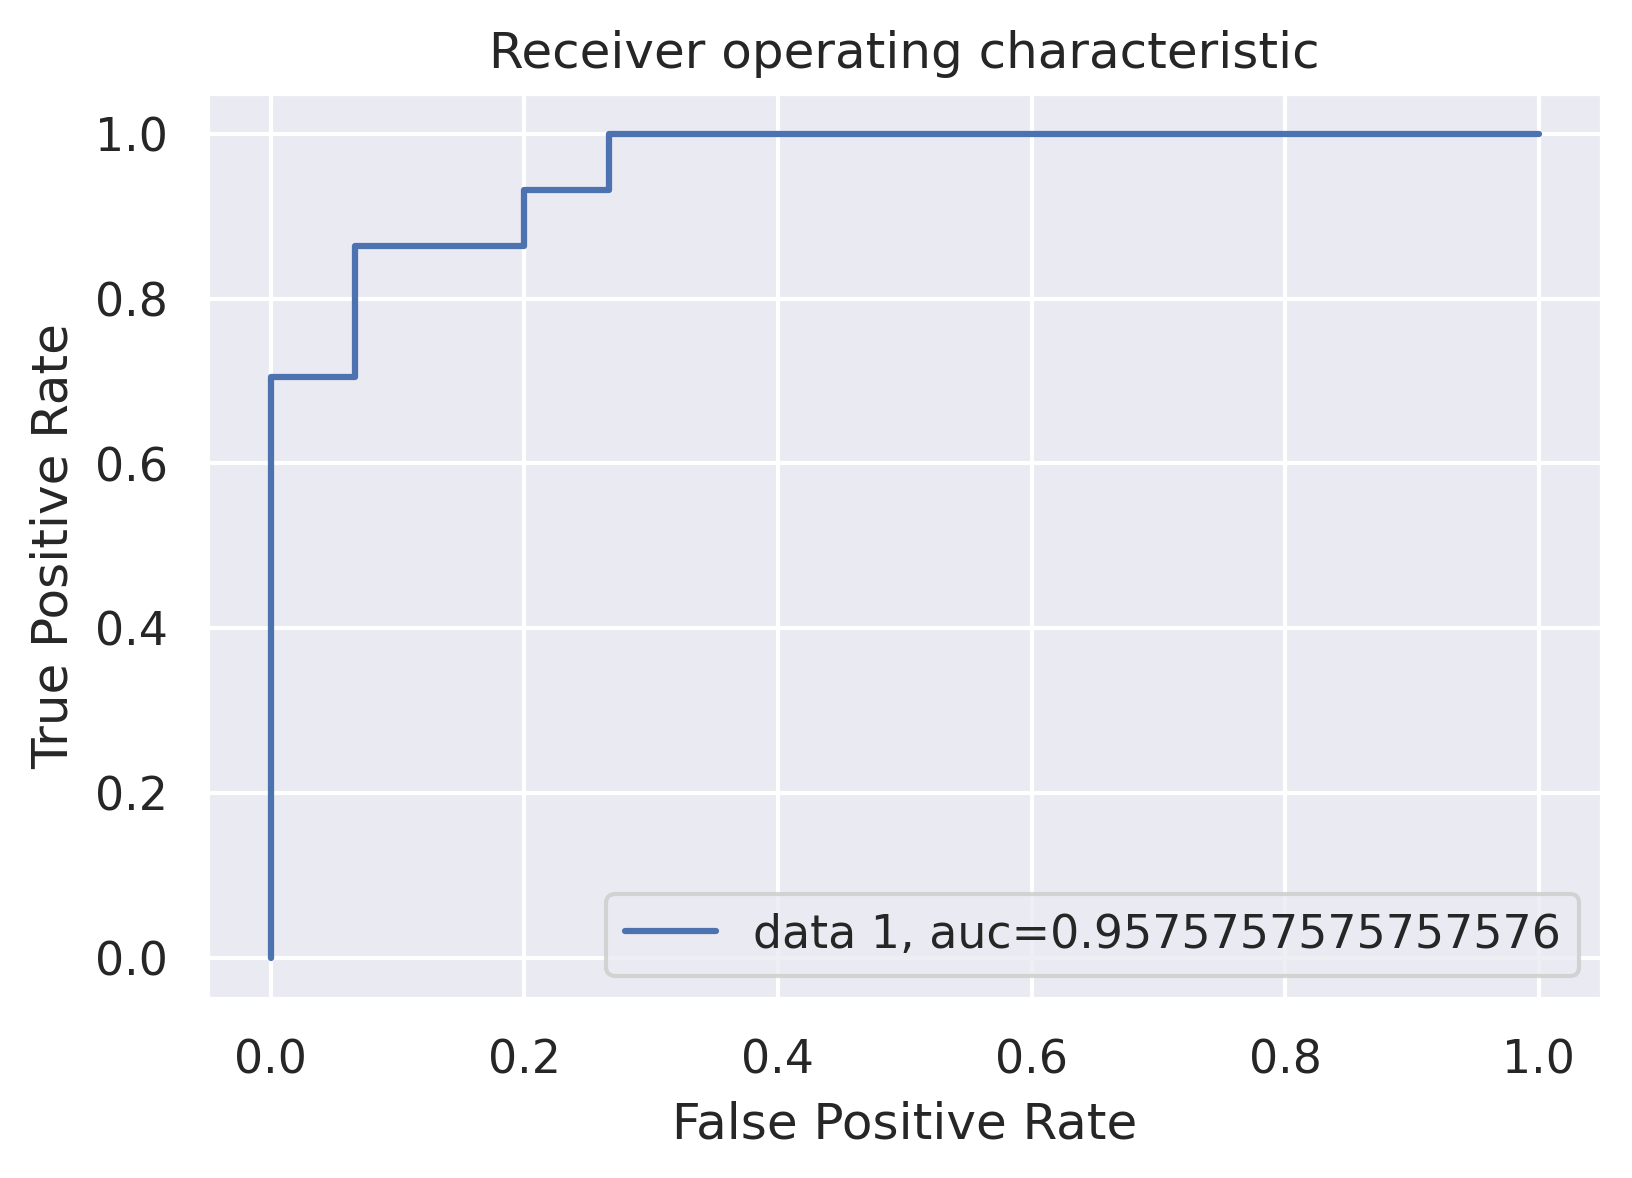

In [99]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

# Comparision of all Models

In [89]:
data = {"Model name": ["Logistic Regression", "SVM", "Random Forest", "XGBoost", "kNN"], "Accuracy(%)": ["80", "92", "90", "93", "92"], "AUC Score": ["0.87","0.96","0.93","0.93","0.96"]}
Companrison = pd.DataFrame(data)
Companrison

,Model name,Accuracy(%),AUC Score
0,Logistic Regression,80,0.87
1,SVM,92,0.96
2,Random Forest,90,0.93
3,XGBoost,93,0.93
4,kNN,92,0.96


**We can conclude that SVM && kNN Model are best for our dataset as they are giving highest AUC score.

**Hence we will make Prediction System for SVM Model**

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

# Saving best model as pikle

In [93]:
pickle.dump(svm, open('model.pkl', 'wb'))

# Building the Prediction System

## Extra data on which you can try our both Prediction System


**Parkinsons disease positive**

148.46200,161.07800,141.99800,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.16300,0.00950,0.01103,0.01559,0.02849,0.00639,22.86600,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710

**Parkinsons disease negative**

115.38000,123.10900,108.63400,0.00332,0.00003,0.00160,0.00199,0.004800,0.01503,0.13700,0.00812,0.00933,0.01133,0.02436,0.00401,26.00500,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067

## Prediction System - SVM

In [95]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scalar.transform(in_data_re)

saved_model = pickle.load(open('model.pkl', 'rb'))

#print the predicted output for input array
print("Parkinson's Disease Detected" if saved_model.predict(in_data_sca) else "No Parkinson's Disease Detected")

115.38000,123.10900,108.63400,0.00332,0.00003,0.00160,0.00199,0.004800,0.01503,0.13700,0.00812,0.00933,0.01133,0.02436,0.00401,26.00500,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
No Parkinson's Disease Detected


# Finished Thank you :)

# Made By: Mohamed Fadl